Disease Severity: 7.61%


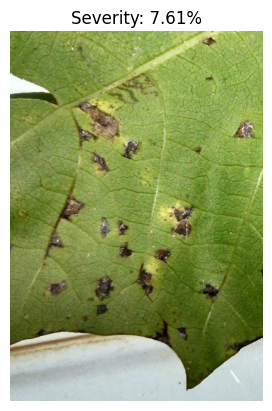

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img_path = "test/bacterial_blight/bact55.jpg"  # Replace with actual test image path
original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Convert to grayscale to get Total Leaf Area (TLA)
gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
_, leaf_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

# Convert to HSV for Infected Leaf Area (ILA) detection
hsv = cv2.cvtColor(original_img, cv2.COLOR_RGB2HSV)

# Define HSV range for diseased areas (you may need to fine-tune this)
lower_bound = np.array([10, 40, 40])  
upper_bound = np.array([30, 255, 255])  

# Create mask for diseased regions
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# Count pixels
total_leaf_pixels = cv2.countNonZero(leaf_mask)  # TLA
infected_pixels = cv2.countNonZero(mask)  # ILA

# Compute severity percentage using the formula
if total_leaf_pixels > 0:  # Avoid division by zero
    severity_percentage = (infected_pixels / total_leaf_pixels) * 100
else:
    severity_percentage = 0

print(f"Disease Severity: {severity_percentage:.2f}%")



# Show the image with severity
plt.imshow(original_img)
plt.axis("off")
plt.title(f"Severity: {severity_percentage:.2f}%")
plt.show()